In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

In [12]:
4997.*5e8

2498500000000.0

In [16]:
4260063992.158334

4260063992.158334

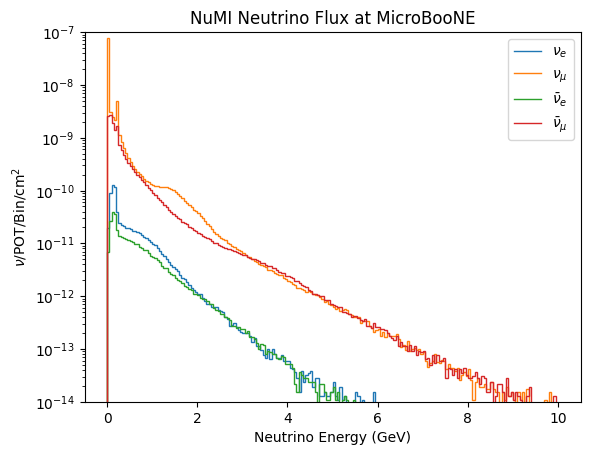

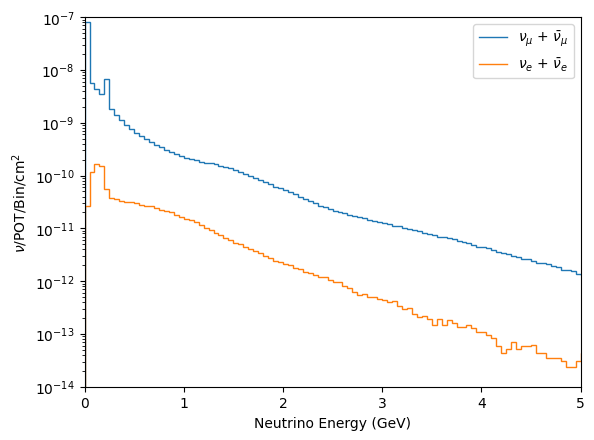

In [77]:

# From /pnfs/uboone/persistent/uboonebeam/bnb_gsimple/bnb_gsimple_fluxes_01.09.2019_463_hist/readme.txt:
#       
#       To normalize to nu/POT/bin/cm2 apply the scale factor:
#       scale_factor=1/(4997.*5e8)/(256.35*233.);

beam = 'NuMI'

barn = 1e-28 # m2
fbarn = 1e-15*barn # m2
fbarn = fbarn * 1e4 # cm2

nu_flavour = 'numu' # PDG code for nu_mu

# 

# if beam == 'BNB':
#     flux_file = uproot.open('/exp/uboone/app/users/jbateman/workdir/DarkNews/Trident/data/flux/bnb/MCC9_FluxHist_volTPCActive_w2D_hists.root')

# elif beam == 'NuMI':
#     flux_file = uproot.open('/exp/uboone/app/users/jbateman/workdir/DarkNews/Trident/data/flux/numi/MCC9_FluxHist_volTPCActive_w2D_hists.root')
# else:
#     raise ValueError('Invalid beam specified')
bnb_flux_dict = {}
numi_flux_dict = {}

for beam in ['BNB', 'NuMI']:
    if beam == 'BNB':
        flux_file = uproot.open('/exp/uboone/app/users/jbateman/workdir/DarkNews/Trident/data/flux/bnb/MCC9_FluxHist_volTPCActive_w2D_hists.root')

    elif beam == 'NuMI':
        flux_file = uproot.open('/exp/uboone/app/users/jbateman/workdir/DarkNews/Trident/data/flux/numi/MCC9_FluxHist_volTPCActive_w2D_hists.root')
    else:
        print('Invalid beam specified')
        continue

    flux_dict = {}
    for flavour in ['nue', 'numu', 'nuebar', 'numubar']:
        hist = flux_file[f'hE{flavour}_cv']
        values = hist.values() # units: nu/POT/bin/cm2

        flux_dict[flavour] = values
        edges = hist.axis().edges()
    flux_dict['bins'] = edges

    if beam == 'BNB':
        bnb_flux_dict = flux_dict
    elif beam == 'NuMI':
        numi_flux_dict = flux_dict


name_dict = {
    'nue': r'$\nu_e$',
    'numu': r'$\nu_\mu$',
    'nuebar': r'$\bar{\nu}_e$',
    'numubar': r'$\bar{\nu}_\mu$'
}

if beam == 'BNB':
    flux_dict = bnb_flux_dict
elif beam == 'NuMI':
    flux_dict = numi_flux_dict

for flavour in ['nue', 'numu', 'nuebar', 'numubar']:
    values = flux_dict[flavour]  # units: nu/POT/bin/cm2
    edges = flux_dict['bins']
    plt.stairs(values, edges, label=name_dict[flavour])


plt.legend()
plt.yscale('log')
plt.ylim(1e-14, 1e-7)
plt.xlabel('Neutrino Energy (GeV)')
plt.ylabel(r'$\nu$/POT/Bin/cm$^{2}$')
plt.title(f'{beam} Neutrino Flux at MicroBooNE')
plt.show()

flux_dict['bins'] = edges
plt.stairs(flux_dict['numu'] + flux_dict['numubar'], edges, label=name_dict['numu'] + ' + ' + name_dict['numubar'])
plt.stairs(flux_dict['nue'] + flux_dict['nuebar'], edges, label=name_dict['nue'] + ' + ' + name_dict['nuebar'])


plt.legend()
plt.yscale('log')
plt.xlabel('Neutrino Energy (GeV)')
plt.ylabel(r'$\nu$/POT/Bin/cm$^{2}$')
plt.ylim(1e-14, 1e-7)
plt.xlim(0, 5)
plt.show()

## BNB

In [78]:
cross_section_dict = {
    'nue > nue e+ e-': [0.00194201, 4.14222e-06],  # fbarn
    'numu > nue e+ mu-': [0.000493045, 3.18168e-07],  # fbarn
    'numu > numu e+ e-': [0.000313885, 1.00487e-06],  # fbarn
    'numu > numu mu+ mu-': [2.20805e-05, 1.15861e-08],  # fbarn

}

exposure = 1.32e21  # POT
M_Ar = 86e3 # kg of argon in the fiducial volume
m_Ar = 39.95 # g/mol
N_A = 6.022e23  # atoms/mol
N_targets = (M_Ar * 1e3 / m_Ar) * N_A  # number of argon atoms

flux_dict = bnb_flux_dict

for key, cross_sections in cross_section_dict.items():
    # incoming flavour from key
    flavour = key.split(' > ')[0]

    values = flux_dict[flavour]
    print(f'Calculating for process: {key}')

    N_per_pot_per_cm2 = np.sum(values)
    xsec, xsec_err = cross_sections
    xsec_cm2 = xsec * fbarn  # convert to cm2
    xsec_err_cm2 = xsec_err * fbarn  # convert to cm2
    interaction_rate = N_per_pot_per_cm2 * exposure * N_targets * xsec_cm2
    rate_uncertainty = interaction_rate * (xsec_err_cm2 / xsec_cm2) if xsec_err_cm2 else 0.0
    print(f'Process: {key}')
    print(f'  Expected Interactions: {interaction_rate:.4} ± {rate_uncertainty:.3}')
    # print(f'  Expected POT per interaction: {exposure/interaction_rate:.3} ± {exposure/interaction_rate * rate_uncertainty/interaction_rate:.3}\n')


Calculating for process: nue > nue e+ e-
Process: nue > nue e+ e-
  Expected Interactions: 0.2314 ± 0.000494
Calculating for process: numu > nue e+ mu-
Process: numu > nue e+ mu-
  Expected Interactions: 10.67 ± 0.00688
Calculating for process: numu > numu e+ e-
Process: numu > numu e+ e-
  Expected Interactions: 6.79 ± 0.0217
Calculating for process: numu > numu mu+ mu-
Process: numu > numu mu+ mu-
  Expected Interactions: 0.4776 ± 0.000251


## NuMI

In [79]:
cross_section_dict = {
    'nue > nue e+ e-': [0.000751185, 2.14369e-06],  # fbarn
    'numu > nue e+ mu-': [4.85031e-05, 2.8516e-08],  # fbarn
    'numu > numu e+ e-': [2.95432e-05, 1.03692e-07],  # fbarn
    'numu > numu mu+ mu-': [2.8261e-06, 1.33343e-09],  # fbarn

}

exposure = 2.e21  # POT
M_Ar = 86e3 # kg of argon in the fiducial volume
m_Ar = 39.95 # g/mol
N_A = 6.022e23  # atoms/mol
N_targets = (M_Ar * 1e3 / m_Ar) * N_A  # number of argon atoms

flux_dict = numi_flux_dict

for key, cross_sections in cross_section_dict.items():
    # incoming flavour from key
    flavour = key.split(' > ')[0]

    values = flux_dict[flavour]
    print(f'Calculating for process: {key}')

    N_per_pot_per_cm2 = np.sum(values)
    xsec, xsec_err = cross_sections
    xsec_cm2 = xsec * fbarn  # convert to cm2
    xsec_err_cm2 = xsec_err * fbarn  # convert to cm2
    interaction_rate = N_per_pot_per_cm2 * exposure * N_targets * xsec_cm2
    rate_uncertainty = interaction_rate * (xsec_err_cm2 / xsec_cm2) if xsec_err_cm2 else 0.0
    print(f'Process: {key}')
    print(f'  Expected Interactions: {interaction_rate:.4} ± {rate_uncertainty:.3}')
    # print(f'  Expected POT per interaction: {exposure/interaction_rate:.3} ± {exposure/interaction_rate * rate_uncertainty/interaction_rate:.3}\n')


Calculating for process: nue > nue e+ e-
Process: nue > nue e+ e-
  Expected Interactions: 1.445 ± 0.00412
Calculating for process: numu > nue e+ mu-
Process: numu > nue e+ mu-
  Expected Interactions: 12.29 ± 0.00722
Calculating for process: numu > numu e+ e-
Process: numu > numu e+ e-
  Expected Interactions: 7.485 ± 0.0263
Calculating for process: numu > numu mu+ mu-
Process: numu > numu mu+ mu-
  Expected Interactions: 0.716 ± 0.000338


In [110]:
# Estimating expected number of neutrino interactions from NuMI to check that the flux is reasonable

N_nus = np.sum(flux_dict['numu']) + np.sum(flux_dict['numubar']) +  + np.sum(flux_dict['nue']) + np.sum(flux_dict['nuebar'])
N_numi = N_nus * exposure * N_targets * 1e-39 # Taking average cross section to be ~ 1e-39 cm2
print(f'N interactions from NuMI: {N_numi:.3}')

N_estimate = 38 * 2000 * exposure/0.24e21 # Using the 2.4e20 POT timing plot from David: https://microboone.slack.com/archives/CBGJZKS4D/p1717099901678009
print(f'Estimated N interactions from NuMI: {N_estimate:.3}')

N interactions from NuMI: 2.97e+05
Estimated N interactions from NuMI: 6.33e+05


# BSM Rates
I'm not very trusting of these results outside of numu > numu mu+ mu-, as I don't think the coupling should work here. I'm not sure if the others could be mapped onto different models, ie Le-Lmu or what though

In [113]:
bsm_cross_section_dict = {
    "numu > numu mu+ mu- (g' = 0.001, mZ' = 0.1 GeV)": [9.31965e-05, 4.31377e-08],  # fbarn
    "numu > numu e+ e- (g' = 0.001, mZ' = 0.1 GeV)": [0.0194587, 0.000118218],  # fbarn
    "numu > nue e+ mu- (g' = 0.001, mZ' = 0.1 GeV)": [0.00295626, 1.91311e-06],  # fbarn
}

flux_dict = bnb_flux_dict
for key, cross_sections in bsm_cross_section_dict.items():
    # incoming flavour from key
    flavour = key.split(' > ')[0]

    values = flux_dict[flavour]
    print(f'Calculating for process: {key}')

    N_per_pot_per_cm2 = np.sum(values)
    xsec, xsec_err = cross_sections
    xsec_cm2 = xsec * fbarn  # convert to cm2
    xsec_err_cm2 = xsec_err * fbarn  # convert to cm2
    interaction_rate = N_per_pot_per_cm2 * exposure * N_targets * xsec_cm2
    rate_uncertainty = interaction_rate * (xsec_err_cm2 / xsec_cm2) if xsec_err_cm2 else 0.0
    print(f'Process: {key}')
    print(f'  Expected Interactions: {interaction_rate:.3} ± {rate_uncertainty:.3}')
    # print(f'  Expected POT per interaction: {exposure/interaction_rate:.3} ± {exposure/interaction_rate * rate_uncertainty/interaction_rate:.3}\n')


Calculating for process: numu > numu mu+ mu- (g' = 0.001, mZ' = 0.1 GeV)
Process: numu > numu mu+ mu- (g' = 0.001, mZ' = 0.1 GeV)
  Expected Interactions: 3.05 ± 0.00141
Calculating for process: numu > numu e+ e- (g' = 0.001, mZ' = 0.1 GeV)
Process: numu > numu e+ e- (g' = 0.001, mZ' = 0.1 GeV)
  Expected Interactions: 6.38e+02 ± 3.87
Calculating for process: numu > nue e+ mu- (g' = 0.001, mZ' = 0.1 GeV)
Process: numu > nue e+ mu- (g' = 0.001, mZ' = 0.1 GeV)
  Expected Interactions: 96.9 ± 0.0627


In [114]:
g_prime = 1e-3 
m_Z_prime = 0.1  # GeV
vev = 246  # GeV

sin2theta_W = 0.23152
Del_g_V = g_prime**2 * 2 * vev**2 / m_Z_prime**2
Del_g_A = 0  # No axial coupling in this model

g_V = 1 + 4*sin2theta_W + Del_g_V
g_A = -1 + Del_g_A

print(f"g_V: {g_V}, g_A: {g_A}")


g_V: 14.029279999999998, g_A: -1


# NuMI Coordinate rotation

In [ ]:
uboone_in_numi = np.array([ 5502.0, 7259.0,  67270.0])  # cm

numi_to_uboone_matrix = np.array([
    [0.9210385380402568, 0.0227135048039241207, 0.38880857519374290],
    [0.0000462540012621546684, 0.99829162468141475, -0.0584279894529063024],
    [-0.38947144863934974, 0.0538324139386641073, 0.91946400794392302]
    ])

numi_in_uboone = -numi_to_uboone_matrix @ uboone_in_numi

print(f'NuMI origin in MicroBooNE coordinates: {numi_in_uboone} cm')

# From the NuMI Technote (https://lss.fnal.gov/archive/2015/pub/fermilab-pub-15-253-ad-fess-nd.pdf):
# "The Target Hall is located approximately 41 m underground" 
# So this y value makes sense - uBooNE is also underground, but definitely not 41 m underground

NuMI origin in MicroBooNE coordinates: [-31387.58422095  -3316.40254258 -60100.24139675] cm


In [148]:
numi_vec = np.array([0,0,1])  # beam along z direction
# numi_vec_in_uboone = numi_to_uboone_matrix @ numi_vec.T
numi_vec_in_uboone = np.matmul(numi_to_uboone_matrix, numi_vec)
print(f'NuMI beam direction in MicroBooNE coordinates: {numi_vec_in_uboone}')

NuMI beam direction in MicroBooNE coordinates: [ 0.38880858 -0.05842799  0.91946401]


In [149]:
numi_ub_vec = -numi_in_uboone / np.linalg.norm(numi_in_uboone)
off_axis_angle = np.dot(numi_ub_vec, numi_vec_in_uboone)
print(f'Off-axis angle cosine: {off_axis_angle}')
angle = np.arccos(off_axis_angle) * 180/np.pi
print(f'Off-axis angle: {angle:.5} degrees')

# in numi coords
det_vec = uboone_in_numi / np.linalg.norm(uboone_in_numi)
off_axis_angle = np.dot(det_vec, [0,0,1])
angle = np.arccos(off_axis_angle) * 180/np.pi
print(f'Off-axis angle (calculated in beam coords): {angle:.5} degrees')

Off-axis angle cosine: 0.9909572523283878
Off-axis angle: 7.7111 degrees
Off-axis angle (calculated in beam coords): 7.7111 degrees


In [ ]:
h = numi_vec_in_uboone[1]

L = np.sqrt(numi_vec_in_uboone[0]**2 + numi_vec_in_uboone[2]**2)

angle = np.arctan2(h, L) * 180/np.pi
print(f'Angle of NuMI beam relative to ground plane: {angle} degrees')
print('NuMI technote says this angle is 3.34349 degrees')

Angle of NuMI beam relative to ground plane: -3.3495848665919707 degrees
NuMI technote says this angle is 3.34349 degrees


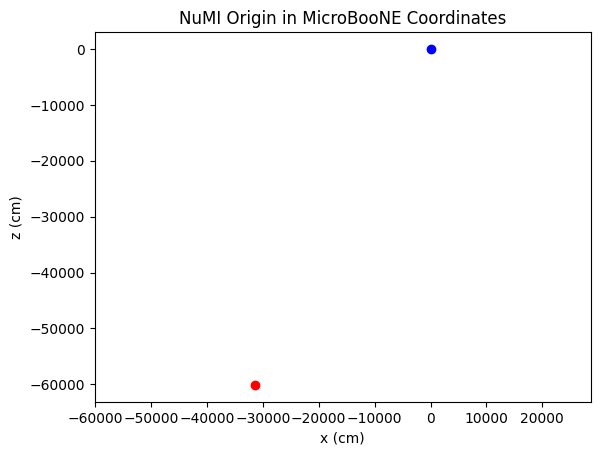

In [152]:
plt.plot(0,0, 'bo')
plt.plot(numi_in_uboone[0], numi_in_uboone[2], 'ro')
plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('NuMI Origin in MicroBooNE Coordinates')
plt.axis('equal')
plt.show()